In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pickle

# 1- Full Data Evaluations

In [2]:
load_model = True # if true, it loads a trained model instead of training a new one
models_folder = 'models\\'
X = np.genfromtxt('processed_data\\X_scaled.csv', delimiter=',')
y = np.genfromtxt('processed_data\\y.csv', delimiter=',')
mask_train = np.genfromtxt('processed_data\\mask_train.csv', delimiter=',', dtype=bool)

In [3]:
X_train = X[mask_train, :]
X_test = X[~mask_train, :]

y_train = y[mask_train]
y_test = y[~mask_train]

1.1- Training or Loading Model

In [4]:
if load_model:
    with open(models_folder+'clf_full.pkl', 'rb') as file:
        clf_full = pickle.load(file)
    print('Full Model Loaded')
else:
    print('Training Linear SVM on Full Data...')
    clf_full = LinearSVC(dual=False, multi_class='ovr')
    clf_full = clf_full.fit(X_train, y_train)
    with open(models_folder+'clf_full.pkl', 'wb') as file:
        pickle.dump(clf_full, file)
    print(f'Model Trained on Full Data and stored at\n\t{models_folder+"clf_full.pkl"}')    

Full Model Loaded


c:\Users\smerf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.1.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
p_train = clf_full.predict(X_train)
p_test = clf_full.predict(X_test)

1.2- Metrics for Train Data on Full Model

-- Linear SVM Classifier --
Train Accuracy: 92.63%
Confusion Matrix (Train):
[[5800    1   13    9    8   18   28    3   36    7]
 [   1 6601   30   11    7   23    2   11   48    8]
 [  40   46 5416   84   58   26   57   70  142   19]
 [  20   26  154 5495   11  172   20   53  118   62]
 [   9   23   30    7 5487   15   30   14   53  174]
 [  53   24   40  164   59 4785   95   17  122   62]
 [  30   12   30    3   26   78 5707    2   27    3]
 [  12   21   55   13   53   10    6 5908   17  170]
 [  46  132   73  146   42  165   48   27 5081   91]
 [  25   19   27  105  184   44    2  194   49 5300]]


Normalized Confusion Matrix (Train):
[[98.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0. 98.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  1. 91.  1.  1.  0.  1.  1.  2.  0.]
 [ 0.  0.  3. 90.  0.  3.  0.  1.  2.  1.]
 [ 0.  0.  1.  0. 94.  0.  1.  0.  1.  3.]
 [ 1.  0.  1.  3.  1. 88.  2.  0.  2.  1.]
 [ 1.  0.  1.  0.  0.  1. 96.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0. 94.  0.  3.]
 [ 1.  2.  1.  2.  1.  3.  1.  0. 87.  2.]
 [ 0.  0.  0.  2.  3.  1.  0.  3.  1. 89.]]


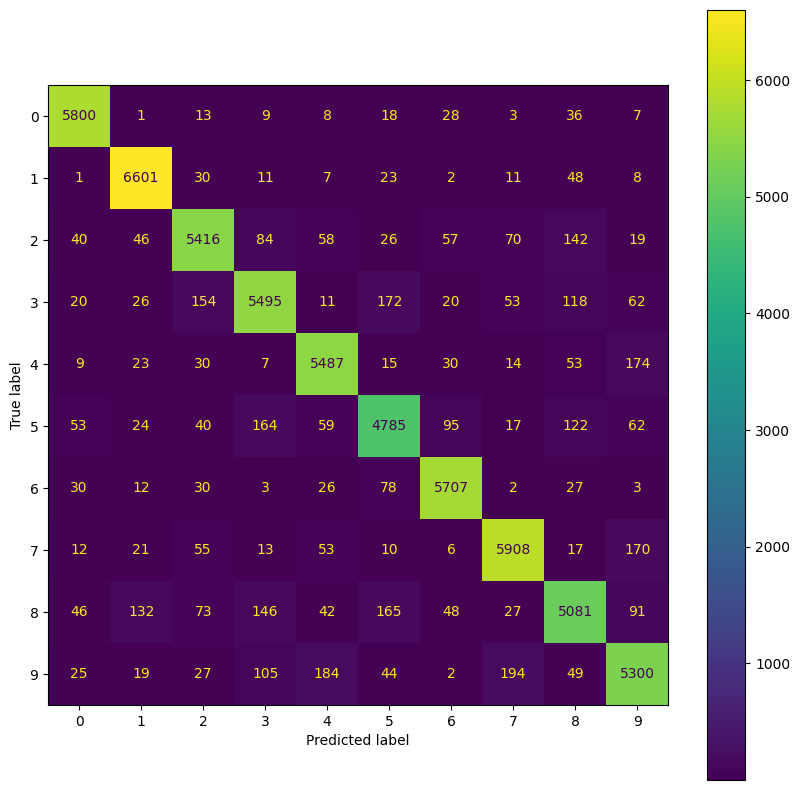

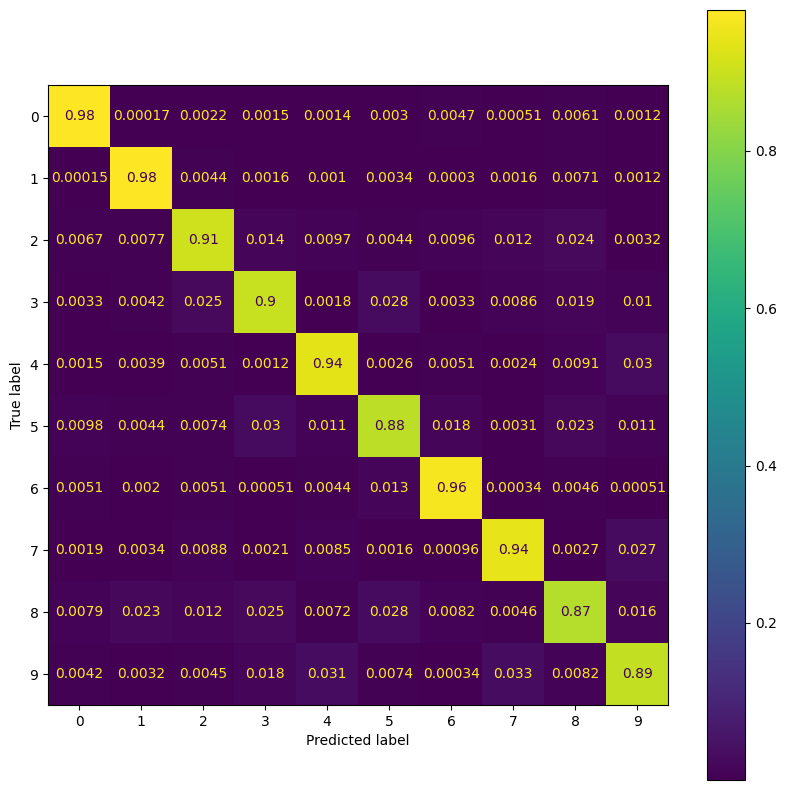

In [6]:
print('-- Linear SVM Classifier --')
print(f'Train Accuracy: {round(clf_full.score(X_train, y_train)*100, 2)}%')

cm = confusion_matrix(y_train, p_train)
print(f'Confusion Matrix (Train):\n{cm}')
fig, ax = plt.subplots(figsize=(10,10))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(ax=ax)

cmn = confusion_matrix(y_train, p_train, normalize='true')
print(f'Normalized Confusion Matrix (Train):\n{np.round(cmn*100)}')
fig, ax = plt.subplots(figsize=(10,10))
cmnd = ConfusionMatrixDisplay(cmn)
cmnd.plot(ax=ax)

In [7]:
tp_fp_classes = np.sum(cm, axis=0)
tp_fn_classes = np.sum(cm, axis=1)
list_precisions = []
list_recalls = []
for i in range(cm.shape[0]):
    tp_fp = tp_fp_classes[i]
    tp_fn = tp_fn_classes[i]
    tp = cm[i,i]
    precision = tp / tp_fp
    recall = tp / tp_fn
    list_precisions.append(precision)
    list_recalls.append(recall)
    # print(f'* Class {i} *')
    # print(f'Precision: {precision}')
    # print(f'Recall: {recall}')
    
PR = pd.DataFrame(index=['Precision (Train)', 'Recall (Train)'], columns=range(10))
PR.iloc[0] = list_precisions
PR.iloc[1] = list_recalls
PR

,0,1,2,3,4,5,6,7,8,9
Precision (Train),0.960901,0.955974,0.922972,0.91022,0.924516,0.896739,0.95196,0.937927,0.8925,0.898915
Recall (Train),0.979233,0.979086,0.90903,0.896265,0.939233,0.882678,0.964346,0.943017,0.868399,0.890906


-- Linear SVM Classifier --
Test Accuracy: 91.81%
Confusion Matrix (Test):
[[ 962    0    2    1    1    4    5    3    1    1]
 [   0 1112    3    2    0    1    5    1   11    0]
 [  11   11  914   18   10    4   13   12   36    3]
 [   4    0   19  918    2   22    5   12   20    8]
 [   1    4    5    4  913    0    9    3    5   38]
 [   9    2    0   39   12  767   18    7   30    8]
 [   7    4    7    2    5   21  909    1    2    0]
 [   2    8   23    5    7    1    1  947    4   30]
 [  11   13    8   21   14   31    8   13  843   12]
 [   7    8    2   15   31   12    0   26   12  896]]


Normalized Confusion Matrix (Test):
[[98.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0. 98.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  1. 89.  2.  1.  0.  1.  1.  3.  0.]
 [ 0.  0.  2. 91.  0.  2.  0.  1.  2.  1.]
 [ 0.  0.  1.  0. 93.  0.  1.  0.  1.  4.]
 [ 1.  0.  0.  4.  1. 86.  2.  1.  3.  1.]
 [ 1.  0.  1.  0.  1.  2. 95.  0.  0.  0.]
 [ 0.  1.  2.  0.  1.  0.  0. 92.  0.  3.]
 [ 1.  1.  1.  2.  1.  3.  1.  1. 87.  1.]
 [ 1.  1.  0.  1.  3.  1.  0.  3.  1. 89.]]


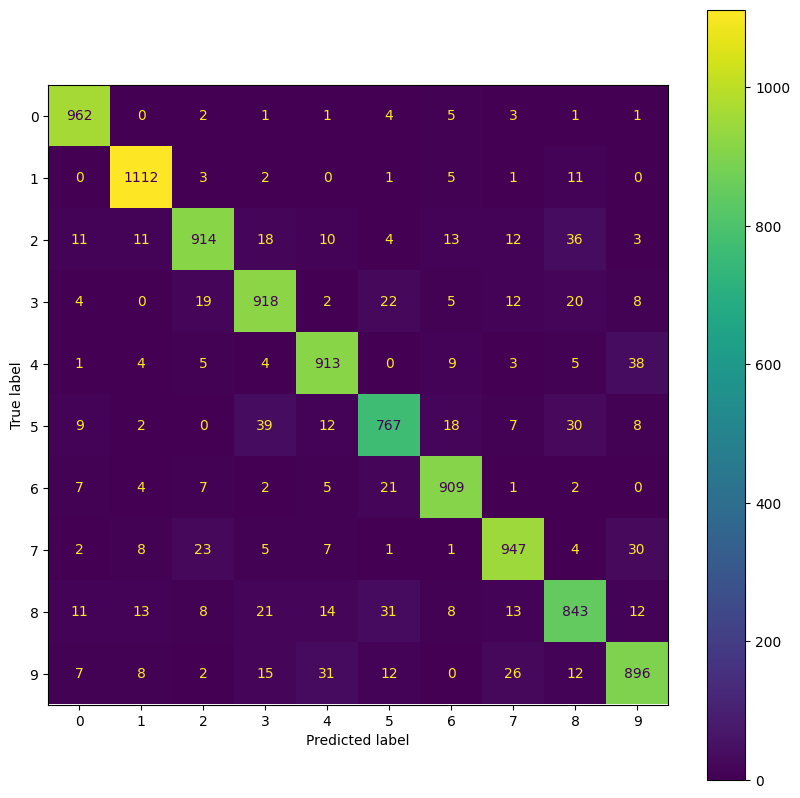

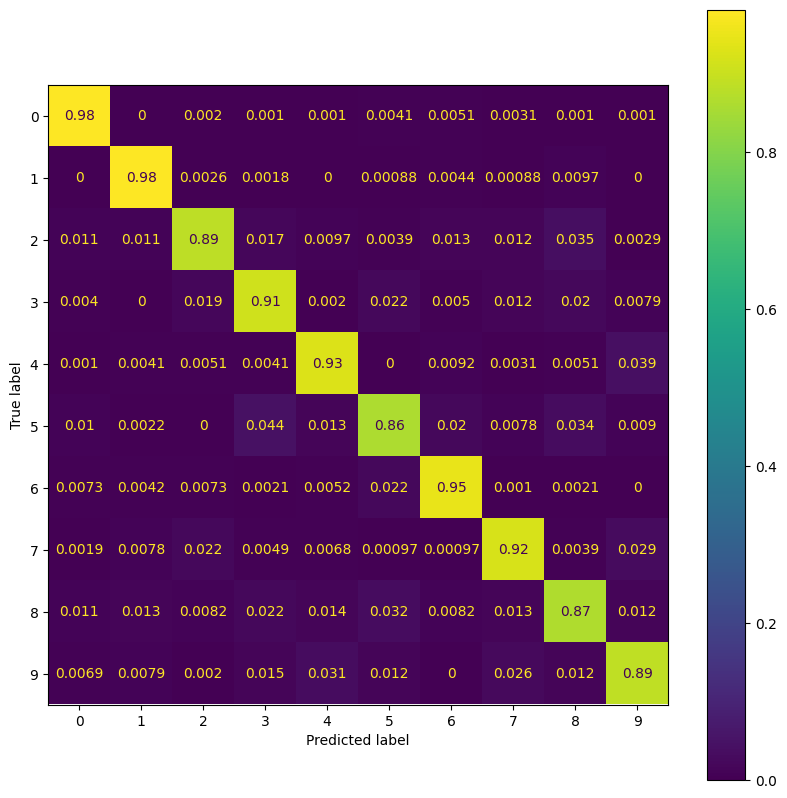

In [8]:
print('-- Linear SVM Classifier --')
print(f'Test Accuracy: {round(clf_full.score(X_test, y_test)*100, 2)}%')

cm = confusion_matrix(y_test, p_test)
print(f'Confusion Matrix (Test):\n{cm}')
fig, ax = plt.subplots(figsize=(10,10))
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(ax=ax)

cmn = confusion_matrix(y_test, p_test, normalize='true')
print(f'Normalized Confusion Matrix (Test):\n{np.round(cmn*100)}')
fig, ax = plt.subplots(figsize=(10,10))
cmnd = ConfusionMatrixDisplay(cmn)
cmnd.plot(ax=ax)

In [9]:
tp_fp_classes = np.sum(cm, axis=0)
tp_fn_classes = np.sum(cm, axis=1)
list_precisions = []
list_recalls = []
for i in range(cm.shape[0]):
    tp_fp = tp_fp_classes[i]
    tp_fn = tp_fn_classes[i]
    tp = cm[i,i]
    precision = tp / tp_fp
    recall = tp / tp_fn
    list_precisions.append(precision)
    list_recalls.append(recall)
    # print(f'* Class {i} *')
    # print(f'Precision: {precision}')
    # print(f'Recall: {recall}')
    
PR = pd.DataFrame(index=['Precision (Test)', 'Recall (Test)'], columns=range(10))
PR.iloc[0] = list_precisions
PR.iloc[1] = list_recalls
PR

,0,1,2,3,4,5,6,7,8,9
Precision (Test),0.948718,0.956971,0.929807,0.89561,0.917588,0.88876,0.934224,0.923902,0.874481,0.899598
Recall (Test),0.981633,0.979736,0.885659,0.908911,0.929735,0.859865,0.948852,0.921206,0.865503,0.888008


In [10]:
s_train = clf_full.decision_function(X_train)
s_test = clf_full.decision_function(X_test)
y_train_b = label_binarize(y_train, classes=range(10))
y_test_b = label_binarize(y_test, classes=range(10))

ROC (Train)


(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC (Train)')

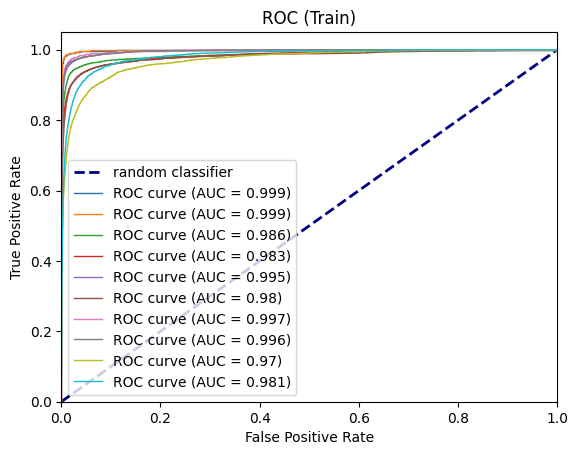

In [11]:
print('ROC (Train)')
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_train_b[:, i], s_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC (Train)")
lw = 1
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=lw)

plt.legend(['random classifier']+[f'ROC curve (AUC = {round(roc_auc[i], 3)})' for i in range(10)])
plt.show()

ROC (Test)


(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC (Test)')

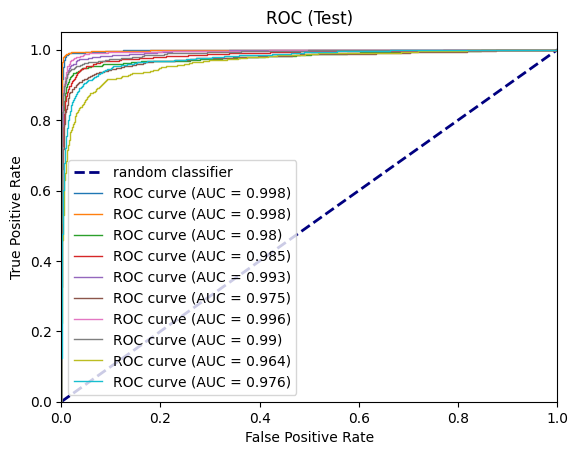

In [12]:
print('ROC (Test)')
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], s_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC (Test)")
lw = 1
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=lw)

plt.legend(['random classifier']+[f'ROC curve (AUC = {round(roc_auc[i], 3)})' for i in range(10)])
plt.show()